In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = True # Turns grid lines on globally
%matplotlib inline

In [2]:
data = pd.read_excel('Lab 11.xlsx',header = 0)
data = data.drop({'Part','S/N','Model','Make'}, axis = 1)
names = data.columns
data

,Nominal Height (in),Left Manometer (in),Right Manometer (in),Supply Voltage (V),Output Voltage (V),Height (in)
0,0,7.3125,7.3125,5.015,1.284,0.0000
1,1,6.8125,7.8125,5.015,1.546,1.0000
2,2,6.3125,8.3125,5.015,1.803,2.0000
3,3,5.8125,8.8125,5.015,2.053,3.0000
4,4,5.3125,9.3125,5.015,2.305,4.0000
5,5,4.8125,9.8125,5.015,2.545,5.0000
6,6,4.3125,10.3125,5.015,2.787,6.0000
7,7,3.8125,10.8125,5.015,3.034,7.0000
8,8,3.3125,11.3125,5.015,3.287,8.0000
9,9,2.8750,11.8125,5.015,3.513,8.9375


In [3]:
data.columns = ['nomHeight','leftMan','rightMan','supV','outV','height']
for SV,OV,i in zip(data.loc[::,'supV'],data.loc[::,'outV'],range(len(data))):
    data.loc[i,'Vout_adj'] = OV/SV*5.
for i in range(len(data)):
    data.loc[i,'Vout_adj_dP'] = data.loc[i,'Vout_adj'] -(data.Vout_adj[0]-1)
data

,nomHeight,leftMan,rightMan,supV,outV,height,Vout_adj,Vout_adj_dP
0,0,7.3125,7.3125,5.015,1.284,0.0000,1.280160,1.000000
1,1,6.8125,7.8125,5.015,1.546,1.0000,1.541376,1.261216
2,2,6.3125,8.3125,5.015,1.803,2.0000,1.797607,1.517448
3,3,5.8125,8.8125,5.015,2.053,3.0000,2.046859,1.766700
4,4,5.3125,9.3125,5.015,2.305,4.0000,2.298106,2.017946
5,5,4.8125,9.8125,5.015,2.545,5.0000,2.537388,2.257228
6,6,4.3125,10.3125,5.015,2.787,6.0000,2.778664,2.498504
7,7,3.8125,10.8125,5.015,3.034,7.0000,3.024925,2.744766
8,8,3.3125,11.3125,5.015,3.287,8.0000,3.277168,2.997009
9,9,2.8750,11.8125,5.015,3.513,8.9375,3.502493,3.222333


In [4]:
#V out = V S *[(0.2*P) + 0.2] ± 6.25% V FSS
P = np.arange(0,3.5,.25)

rho = 62.4 + (62.1-62.4)*(70-32)/(90-32)
for OV,i in zip(data.loc[::,'Vout_adj_dP'],range(len(data))):
    data.loc[i,'dP-'] = (((OV+.0625*4.)/(5.)) - 0.2)/0.2
    data.loc[i,'dP+'] = (((OV-.0625*4.)/(5.)) - 0.2)/0.2
    data.loc[i,'dP']  = (OV/5. - 0.2)/0.2 
    
    data.loc[i,'dPexpected'] = 101.325/407.513*data.loc[i,'height'] 
    data.loc[i,'ExpectedVO'] = 5*((.2*data.loc[i,'dPexpected'])+.2)
    
    data.loc[i,'dPadj'] = data.loc[i,'dP']-data.dP[0]
#data.to_excel('analysisLab11.xlsx')
data

,nomHeight,leftMan,rightMan,supV,outV,height,Vout_adj,Vout_adj_dP,dP-,dP+,dP,dPexpected,ExpectedVO,dPadj
0,0,7.3125,7.3125,5.015,1.284,0.0000,1.280160,1.000000,0.250000,-0.250000,0.000000,0.000000,1.000000,0.000000
1,1,6.8125,7.8125,5.015,1.546,1.0000,1.541376,1.261216,0.511216,0.011216,0.261216,0.248642,1.248642,0.261216
2,2,6.3125,8.3125,5.015,1.803,2.0000,1.797607,1.517448,0.767448,0.267448,0.517448,0.497285,1.497285,0.517448
3,3,5.8125,8.8125,5.015,2.053,3.0000,2.046859,1.766700,1.016700,0.516700,0.766700,0.745927,1.745927,0.766700
4,4,5.3125,9.3125,5.015,2.305,4.0000,2.298106,2.017946,1.267946,0.767946,1.017946,0.994569,1.994569,1.017946
5,5,4.8125,9.8125,5.015,2.545,5.0000,2.537388,2.257228,1.507228,1.007228,1.257228,1.243212,2.243212,1.257228
6,6,4.3125,10.3125,5.015,2.787,6.0000,2.778664,2.498504,1.748504,1.248504,1.498504,1.491854,2.491854,1.498504
7,7,3.8125,10.8125,5.015,3.034,7.0000,3.024925,2.744766,1.994766,1.494766,1.744766,1.740497,2.740497,1.744766
8,8,3.3125,11.3125,5.015,3.287,8.0000,3.277168,2.997009,2.247009,1.747009,1.997009,1.989139,2.989139,1.997009
9,9,2.8750,11.8125,5.015,3.513,8.9375,3.502493,3.222333,2.472333,1.972333,2.222333,2.222241,3.222241,2.222333


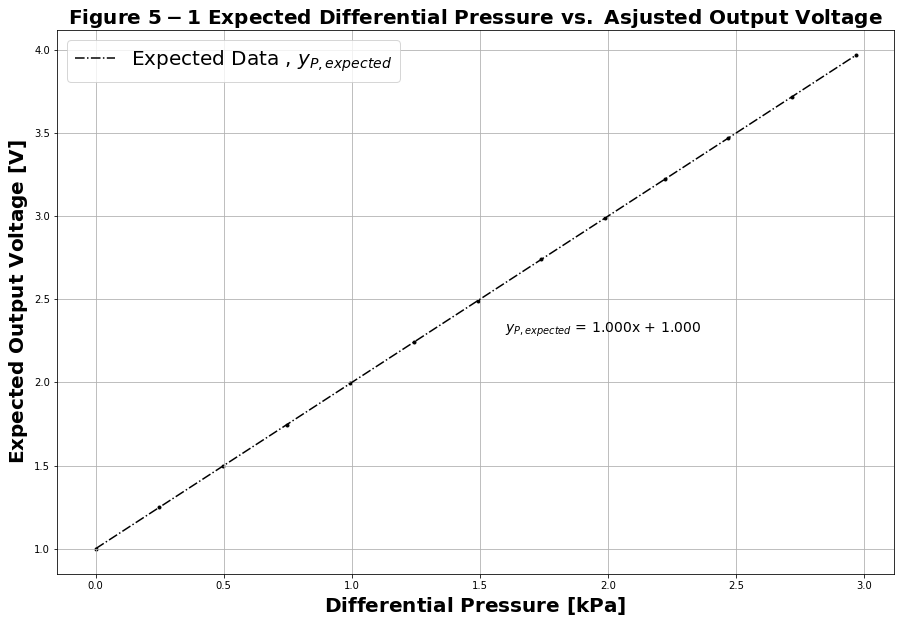

In [5]:
fig1,ax = plt.subplots(figsize = [15,10])
#X = np.linspace(0,3.25,50)
#m = 1
#b = 1
#Y = m*X+1
#atm = 101.32 #kPa
# atm =  407.513 in H2O

p1 = np.polyfit(data.dPexpected,data.ExpectedVO,1)
fit1 = np.polyval(p1,data.dPexpected)
ax.scatter(data.dPexpected,data.ExpectedVO,c = 'black',marker ='.')
ax.plot(data.dPexpected,fit1,color = 'black',linestyle ='-.')
ax.set_ylabel(r'$\bf Expected \ Output \ Voltage \ [V]$',fontsize = 20)
ax.set_xlabel(r'$\bf Differential \ Pressure \ [kPa]$',fontsize=20)
txt = r'$y_{P,expected}$ = %.3fx'%p1[0]+' + %.3f'%p1[1]
ax.text(1.6,2.3,txt,fontsize = 14)
ax.legend(['Expected Data , $y_{P,expected}$'],fontsize = 20)
ax.set_title(r'$\bf Figure \ 5-1 \ Expected \ Differential \ Pressure \ vs. \ Asjusted \ Output \ Voltage$ ',fontsize = 20)
plt.show()
fig1.savefig('Figure_5-1.png')

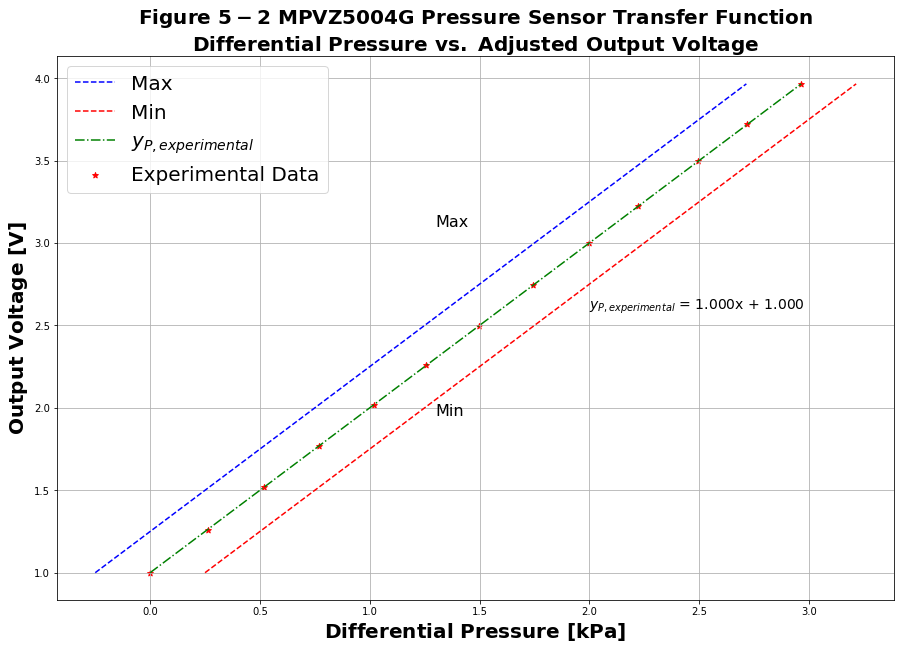

In [14]:
fig2,ax = plt.subplots(figsize = [15,10])
ax.plot(data.loc[::,'dP+'],data.Vout_adj_dP,linestyle='--',c='blue')
ax.plot(data.loc[::,'dP-'],data.Vout_adj_dP,linestyle='--',c='red')

ax.scatter(data.loc[::,'dP'],data.Vout_adj_dP,marker = '*',color = 'red')
ax.set_xlabel(r'$\bf Differential \ Pressure \ [kPa]$',fontsize = 20)
ax.set_title(r'$\bf Figure \ 5-2 \ MPVZ5004G \ Pressure \ Sensor \ Transfer \ Function$'+'\n'+r'$\bf Differential \ Pressure \ vs. \ Adjusted \ Output \ Voltage$ ',fontsize = 20)
ax.set_ylabel(r'$\bf Output \ Voltage \ [V]$',fontsize = 20)
p2 = np.polyfit(data.loc[::,'dP'],data.Vout_adj_dP,1)
#ax.set_yticks([1.0,1.5,2.,2.5,3.,3.5,4.])
fit2 = np.polyval(p2,data.loc[::,'dP'])
ax.plot(data.loc[::,'dP'],fit2,linestyle='-.',c='green')
txt = '$y_{P,experimental}$ = %.3fx'%p2[0]+' + %.3f'%p2[1]
ax.text(2,2.6,txt,fontsize = 14)
ax.text(1.3,1.95,'Min',fontsize = 16)
ax.text(1.3,3.1,'Max',fontsize = 16)
#ax.scatter(data.dPadj,data.Vout_adj-.28016)
ax.legend(['Max','Min','$y_{P,experimental}$','Experimental Data','Adjusted Experimental Data'],fontsize = 20)
plt.show()
fig2.savefig('Figure_5-2.png')

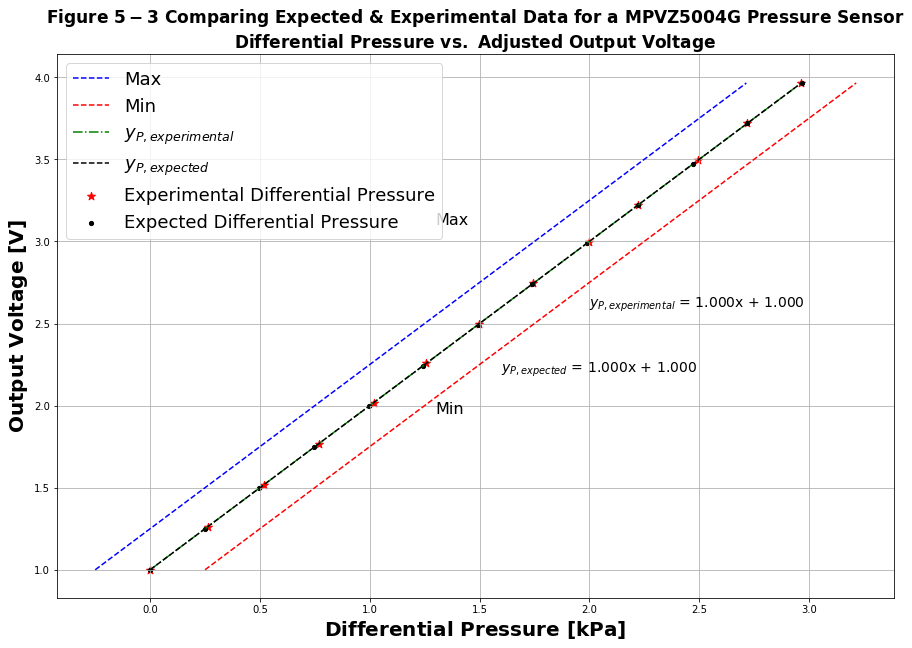

In [13]:
fig3,ax = plt.subplots(figsize = [15,10])
ax.plot(data.loc[::,'dP+'],data.Vout_adj_dP,linestyle='--',c='blue')
ax.plot(data.loc[::,'dP-'],data.Vout_adj_dP,linestyle='--',c='red')

ax.scatter(data.loc[::,'dP'],data.Vout_adj_dP,marker = '*',color = 'red',s = 70)
ax.set_xlabel(r'$\bf Differential \ Pressure \ [kPa]$',fontsize = 20)
ax.set_title(r'$\bf Figure \ 5-3 \ Comparing \ Expected  \ & \ Experimental \ Data \ for \ a \  MPVZ5004G \ Pressure \ Sensor$'+'\n'+r'$\bf Differential \ Pressure \ vs. \ Adjusted \ Output \ Voltage$ ',fontsize = 17)
ax.set_ylabel(r'$\bf Output \ Voltage \ [V]$',fontsize = 20)
p2 = np.polyfit(data.loc[::,'dP'],data.Vout_adj_dP,1)
fit2 = np.polyval(p2,data.loc[::,'dP'])
ax.plot(data.loc[::,'dP'],fit2,linestyle='-.',c='green')
txt = '$y_{P,experimental}$ = %.3fx'%p2[0]+' + %.3f'%p2[1]
ax.text(2,2.6,txt,fontsize = 14)
ax.text(1.3,1.95,'Min',fontsize = 16)
ax.text(1.3,3.1,'Max',fontsize = 16)
ax.plot(data.dPexpected,fit1,color = 'black',linestyle ='--')
#ax.scatter(data.dPadj,data.Vout_adj)
#ax.scatter(data.dPadj,data.Vout_adj-.28016)

ax.scatter(data.dPexpected,data.ExpectedVO,c = 'black',marker = '.',s = 70)
txt = r'$y_{P,expected}$ = %.3fx'%p1[0]+' + %.3f'%p1[1]
ax.text(1.6,2.2,txt,fontsize = 14)
ax.legend(['Max','Min','$y_{P,experimental}$','$y_{P,expected}$','Experimental Differential Pressure','Expected Differential Pressure'],fontsize = 18)
plt.show()
fig3.savefig('Figure_5-3.png')